In [1]:
from yaps.lib import int, real, transformed_parameters, generated_quantities, gamma, normal
import yaps as yaps

In [2]:
@yaps.model
def coin(x: int(lower=0, upper=1)[10]):
    theta: real(lower=0, upper=1) is uniform(0, 1)
    for i in range(10):
        x[i] is bernoulli(theta)

In [3]:
print(coin)

data {
  int<lower=0,upper=1> x[10];
}
parameters {
  real<lower=0,upper=1> theta;
}
model {
  theta ~ uniform(0,1);
  for (i in 1:10)
    x[i] ~ bernoulli(theta);
}



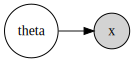

In [4]:
coin.graph

In [5]:
flips = [0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
fit = yaps.infer(coin(x=flips), iter=1000)
print(fit)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL coin_1d59d81653ce56f864b633a5388cb394 NOW.


Inference for Stan model: coin_1d59d81653ce56f864b633a5388cb394.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.24  4.4e-3   0.12   0.05   0.16   0.23   0.31   0.51    703    1.0
lp__   -7.28    0.03    0.8  -9.71  -7.41  -6.98   -6.8  -6.75    784    1.0

Samples were drawn using NUTS at Thu Jul 26 15:41:06 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
